# CUSTOMER CHURN PREDICTION #

Develop a model to predict customer churn for a subscription-based service or business. Use historical customer data, including features like usage behavior and customer demographics, and try algorithms like Logistic Regression, Random Forests, or Gradient Boosting to predict churn.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression , LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [2]:
df_raw = pd.read_csv("Churn_Modelling.csv")

In [3]:
display(df_raw.head())

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [4]:
if len(df_raw.columns) == 1:
    split_col = df_raw.columns[0]
    df = df_raw[split_col].str.split(',', expand=True)
    
    headers = ['RowNumber','CustomerId','Surname','CreditScore','Geography',
               'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
               'IsActiveMember','EstimatedSalary','Exited']
    
    df.columns = headers
else:
    df = df_raw

display(df.head())

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [5]:
display(df.tail())

RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [6]:
print(', '.join(df['Geography'].unique()))

France, Spain, Germany


In [7]:
print(', '.join(map(str, df_raw['Exited'].unique())))

1, 0


In [8]:
from sklearn.preprocessing import LabelEncoder

# Assuming you've already read the data into the dataframe 'df'

# Using LabelEncoder for 'Species' column
label_enc = LabelEncoder()
df['Exited'] = label_enc.fit_transform(df['Exited'])

# Converting other columns (if they are not in a numeric format)
for column in ['RowNumber','CustomerId','Surname','CreditScore','Geography',
               'Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard',
               'IsActiveMember','EstimatedSalary']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

display(df.head())


RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
0          1    15634602      NaN          619        NaN     NaN   42   
1          2    15647311      NaN          608        NaN     NaN   41   
2          3    15619304      NaN          502        NaN     NaN   42   
3          4    15701354      NaN          699        NaN     NaN   39   
4          5    15737888      NaN          850        NaN     NaN   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [9]:
display(df.tail())

RowNumber  CustomerId  Surname  CreditScore  Geography  Gender  Age  \
9995       9996    15606229      NaN          771        NaN     NaN   39   
9996       9997    15569892      NaN          516        NaN     NaN   35   
9997       9998    15584532      NaN          709        NaN     NaN   36   
9998       9999    15682355      NaN          772        NaN     NaN   42   
9999      10000    15628319      NaN          792        NaN     NaN   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.58       1  
9998         92888.52       1  
9999         38190.78       0

In [10]:
print("Shape of Dataset:", df.shape)
print(df.isnull().sum())

Shape of Dataset: (10000, 14)
RowNumber              0
CustomerId             0
Surname            10000
CreditScore            0
Geography          10000
Gender             10000
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Exited                 0
dtype: int64


In [11]:
# Drop columns with all missing values
df= df_raw.dropna(axis=1, how='all')

# Check the shape and info of the cleaned dataset
print(df.shape)
print(df.info())


(10000, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   CreditScore      10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None


In [12]:
display(df['Exited'].value_counts())

0    7963
1    2037
Name: Exited, dtype: int64

In [13]:
display(df.describe())

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

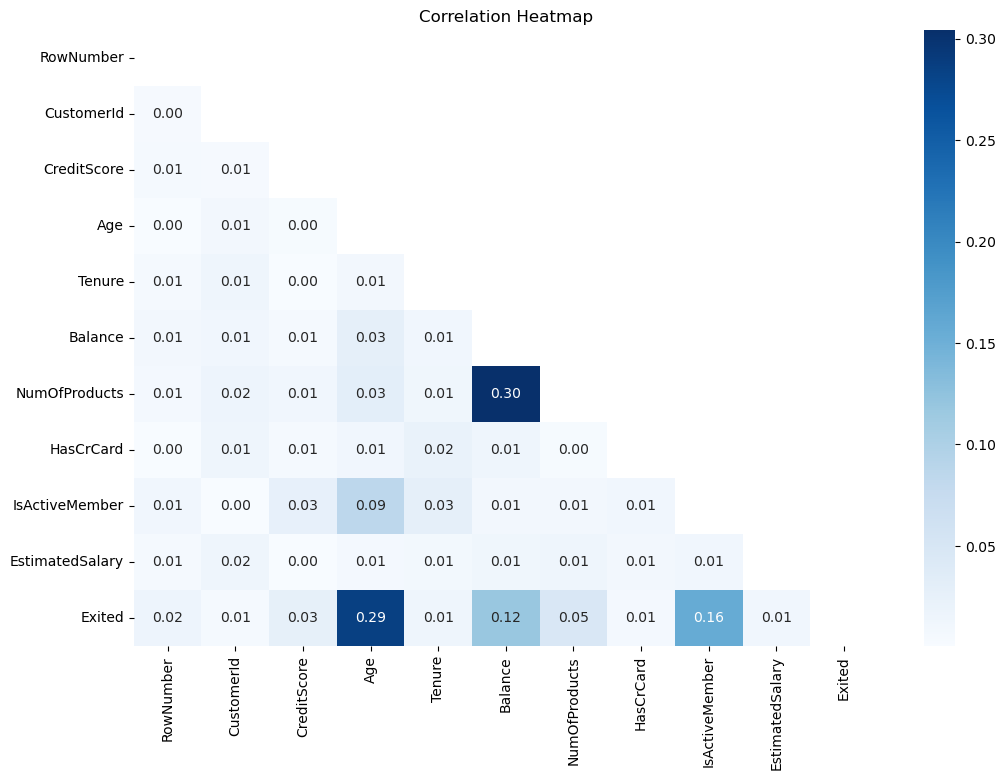

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 8))

# Compute the correlation matrix
correlation_matrix = df.corr().abs()

# Create a mask to hide the upper triangle of the plot (since it's symmetric)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Define the color map
cmap = sns.color_palette("Blues", as_cmap=True)

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap, mask=mask)

# Set the title
plt.title("Correlation Heatmap")

# Show the plot
plt.show()


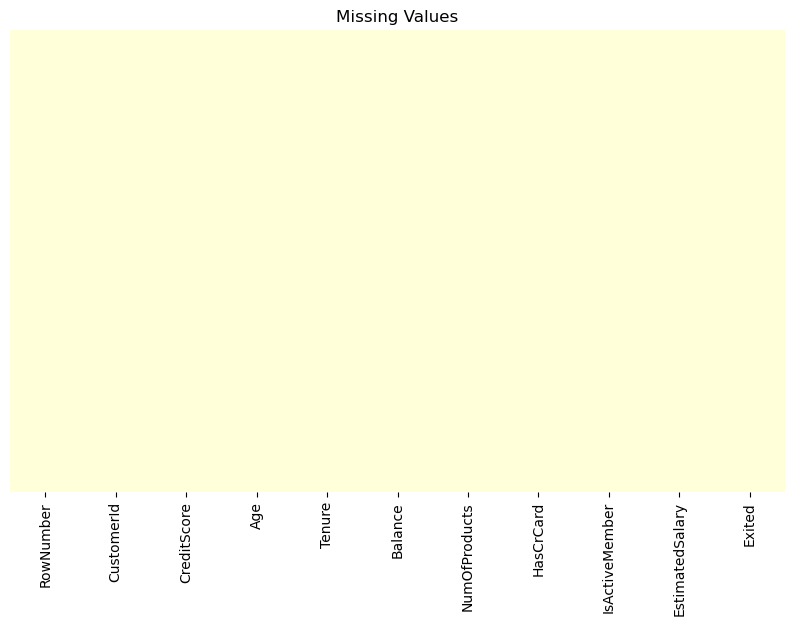

In [15]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Create the heatmap to visualize missing values
heatmap = sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='YlGnBu')

# Add a title
heatmap.set_title("Missing Values")

# Show the plot
plt.show()

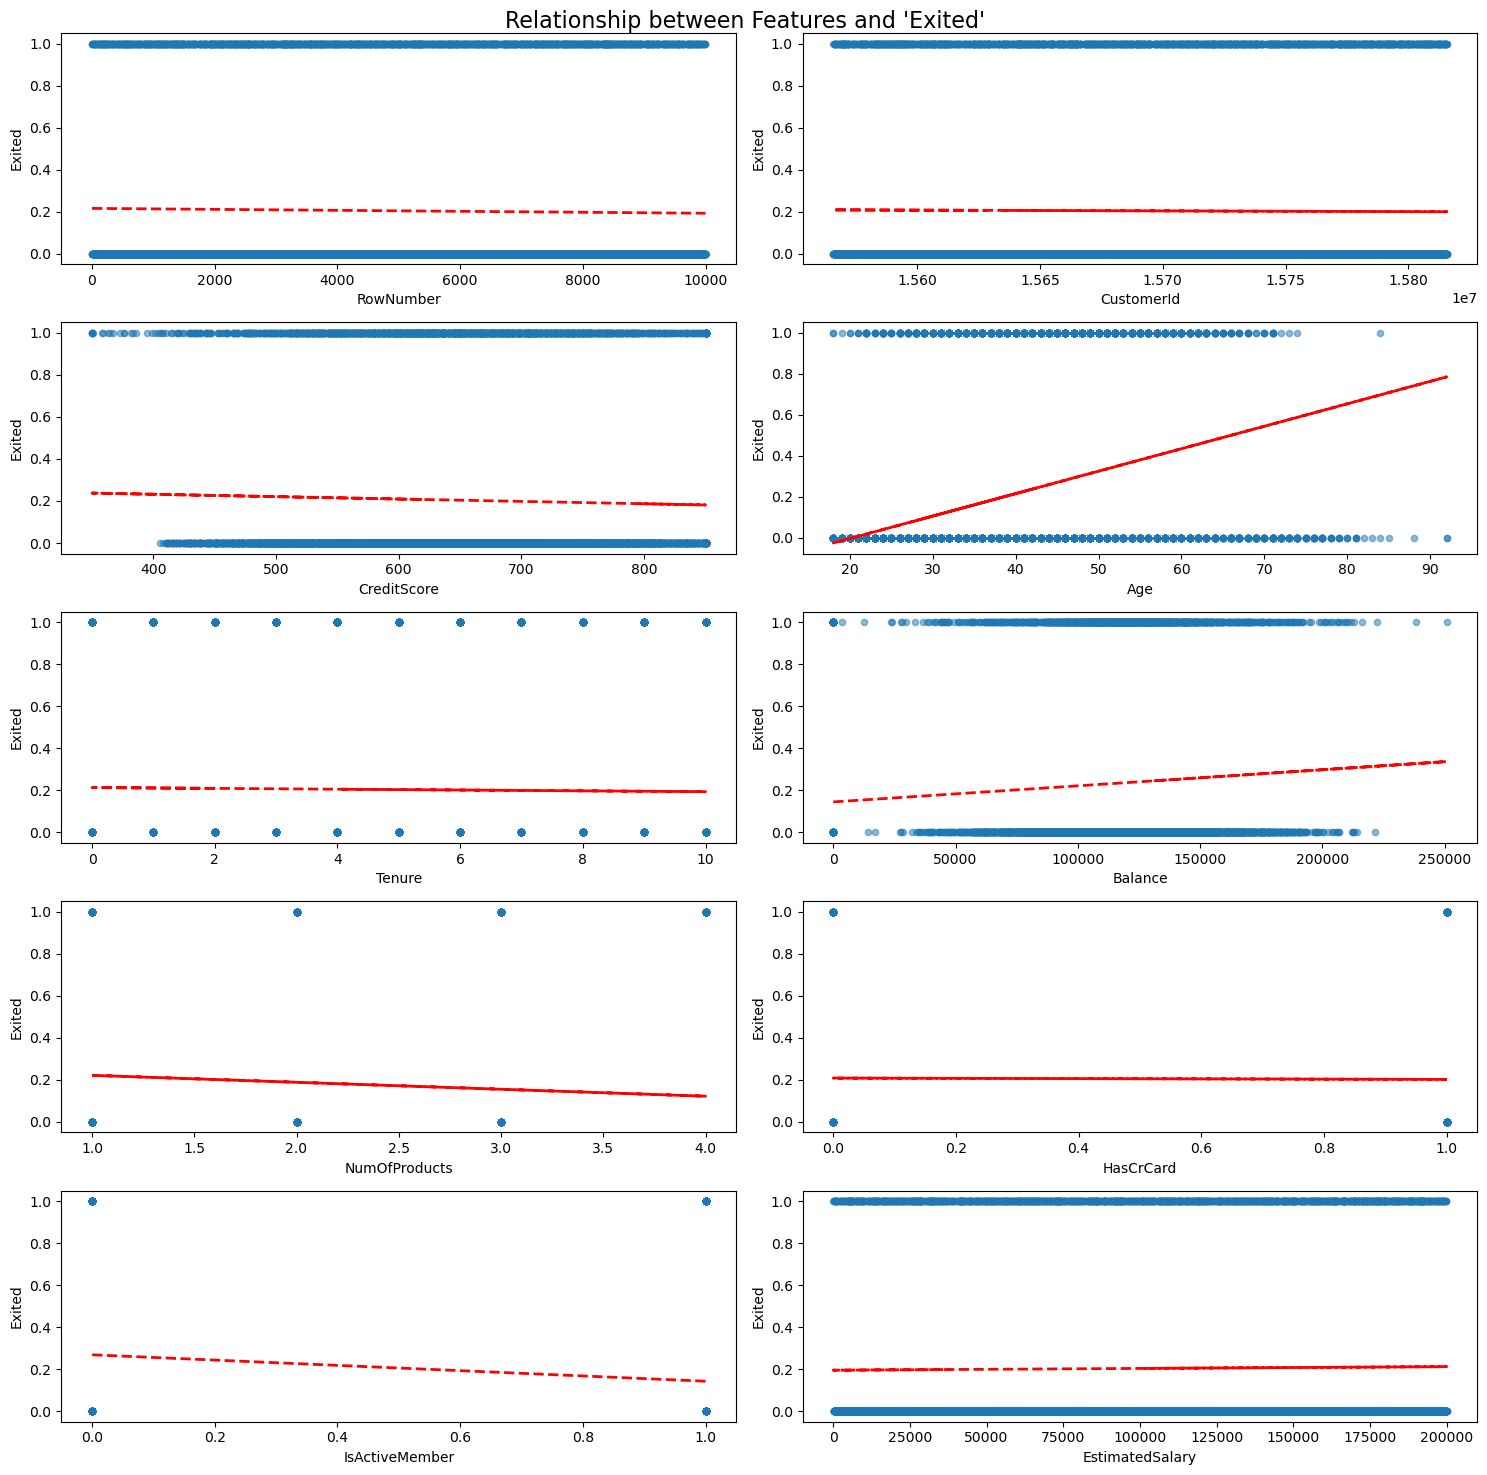

In [16]:
plt.figure(figsize=(15, 15))

for i, col in enumerate(df.columns[0:10]):
    plt.subplot(5, 2, i+1)  # Adjusted subplot layout to 5 rows and 2 columns

    x = df[col]
    y = df['Exited']

    plt.scatter(x, y, s=20, alpha=0.5, label=col)
    z = np.polyfit(x, y, 1)
    p = np.poly1d(z)
    plt.plot(x, p(x), "r--", linewidth=2)  # Fit a linear regression line

    plt.xlabel(col)
    plt.ylabel('Exited')

# Add overall title for the set of subplots
plt.suptitle("Relationship between Features and 'Exited'", fontsize=16)

plt.tight_layout()
plt.show()

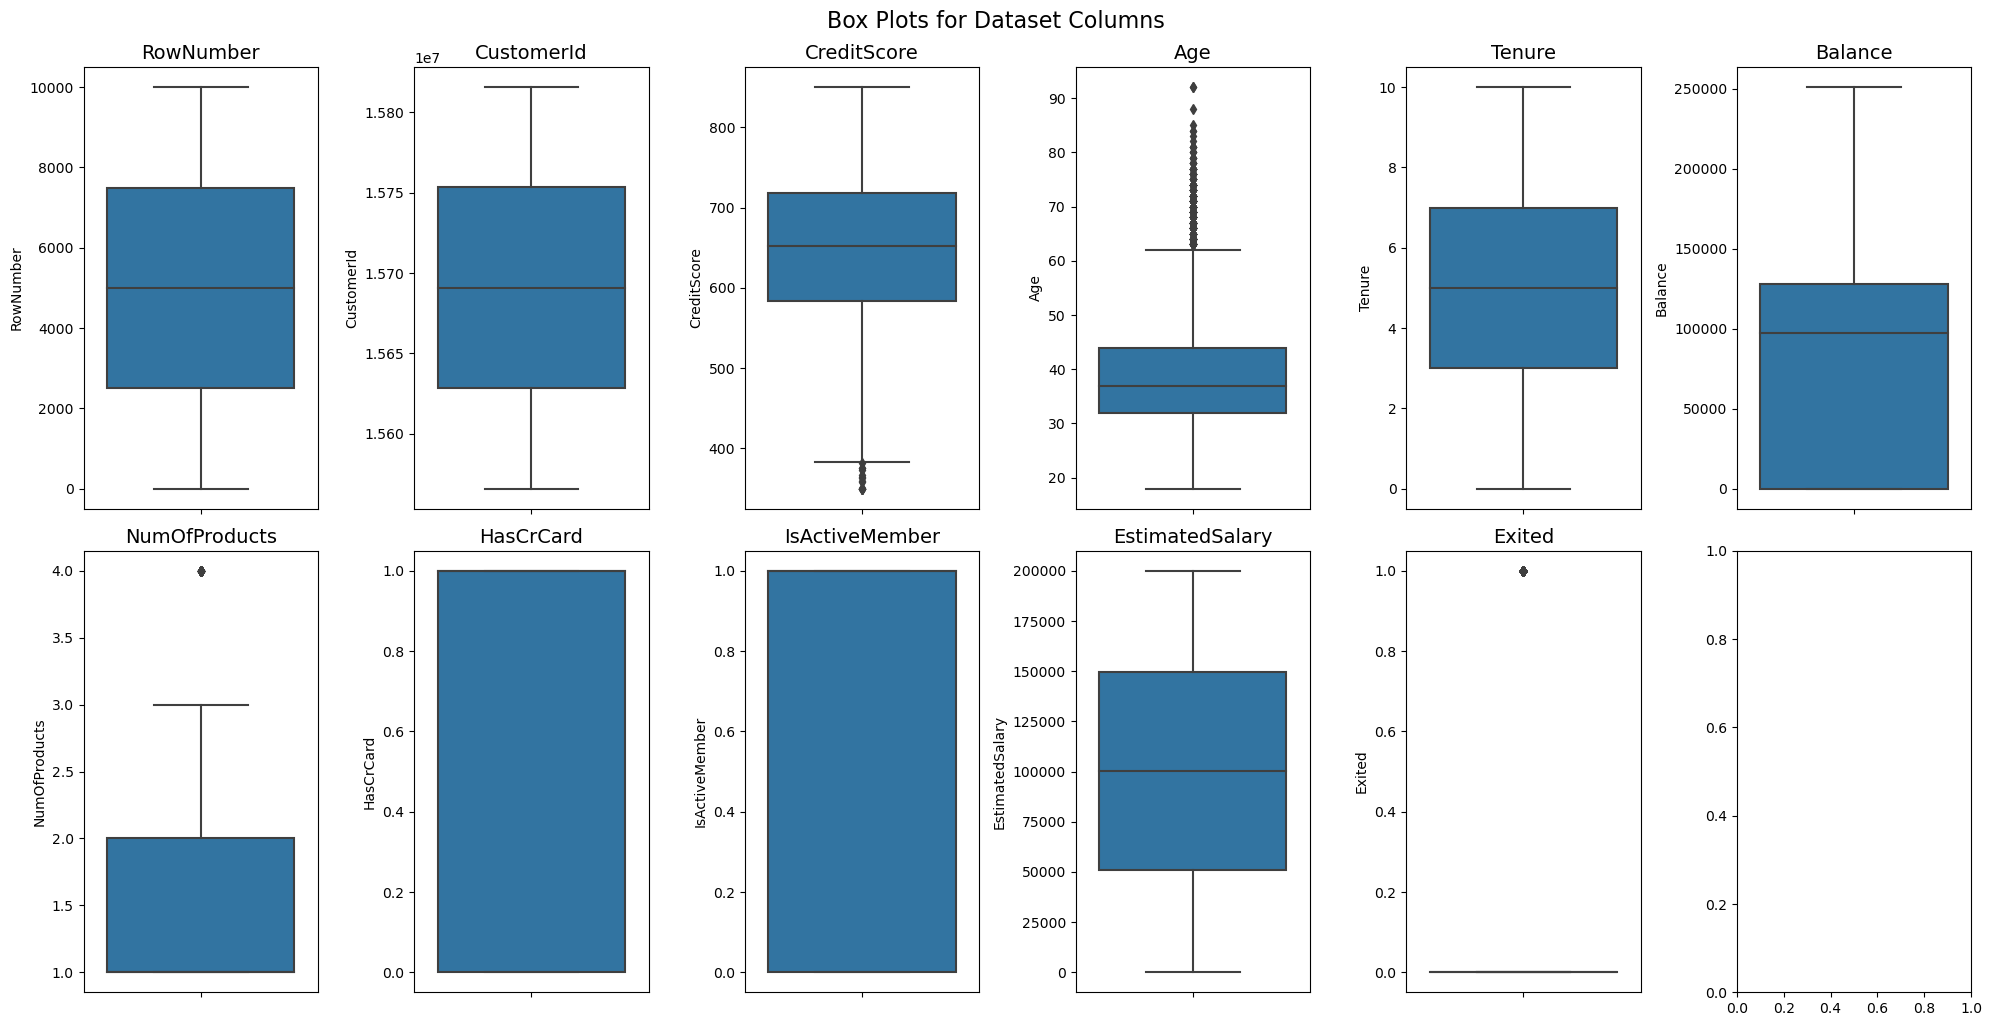

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=6, figsize=(20, 10))
ax = ax.flatten()

for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], ax=ax[i])
    ax[i].set_title(col, fontsize=14)
    ax[i].set_xlabel('')  # Remove x-label to save space

# Adjust the layout and padding for better appearance
plt.tight_layout(pad=1.0, h_pad=1.0)

# Add an overall title for the set of subplots without overlapping
plt.suptitle("Box Plots for Dataset Columns", fontsize=16, y=1.02)

plt.show()

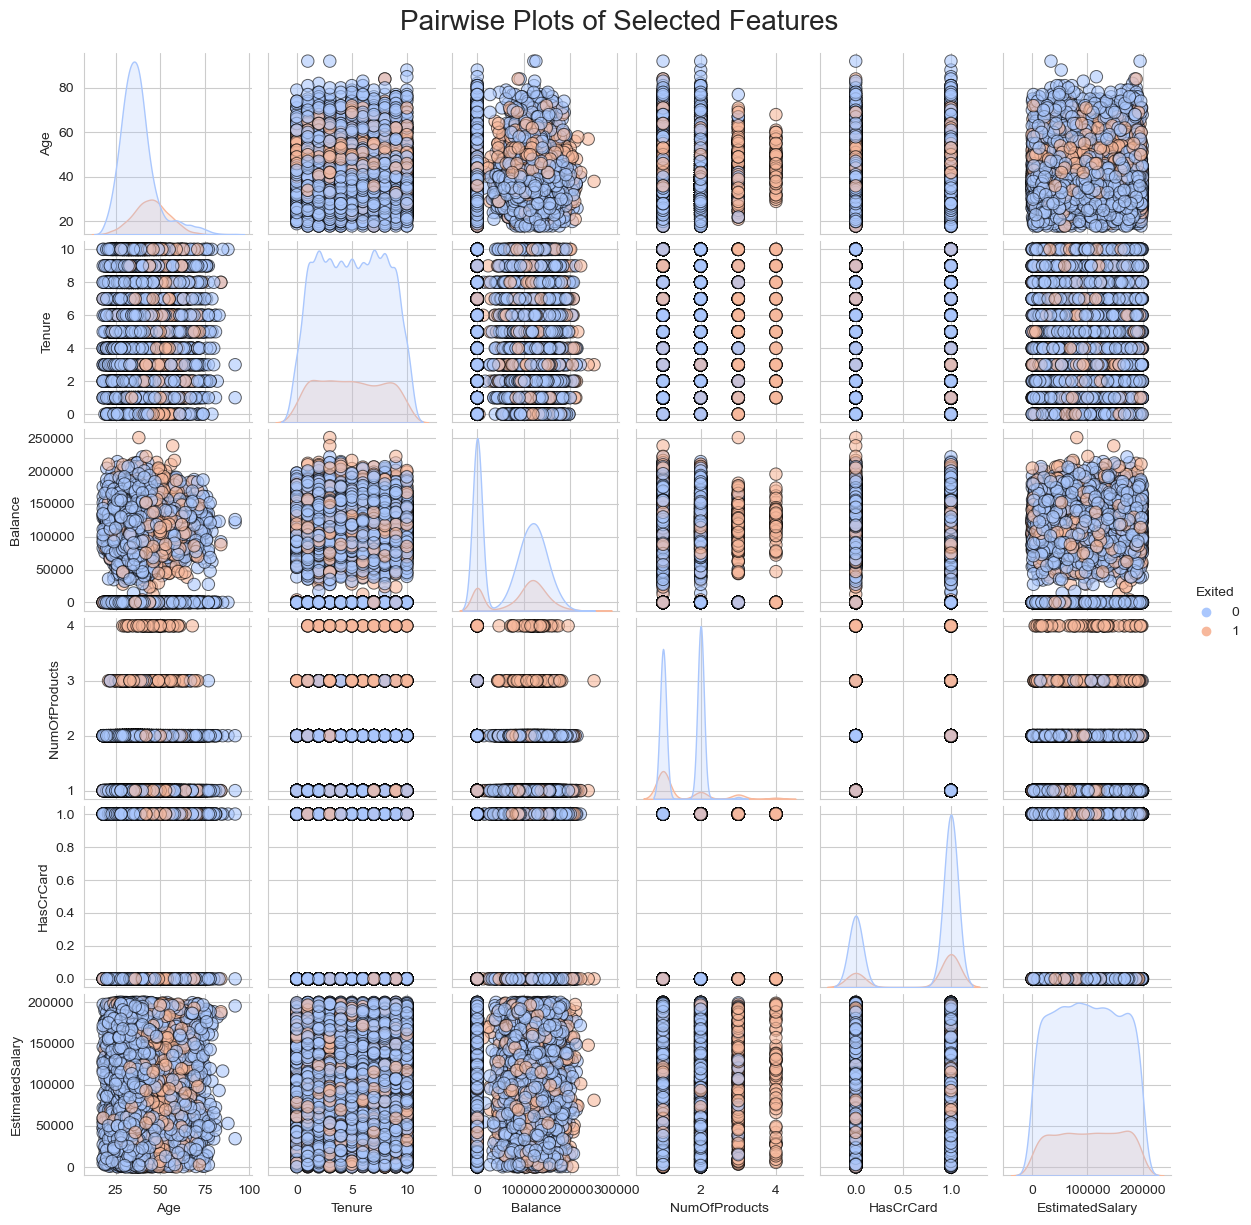

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting the aesthetics for the plot
sns.set_style("whitegrid")

# Selecting the columns you want to include in the pairplot
selected_columns = ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'Exited', 'EstimatedSalary']

# Create an enhanced pairplot with hue for 'Exited'
sns.pairplot(df[selected_columns], 
             diag_kind='kde', 
             hue='Exited',
             palette="coolwarm",  # Choose a color palette that distinguishes between 0 and 1
             plot_kws={'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, 
             height=2)

# Set the title for the plot
plt.suptitle('Pairwise Plots of Selected Features', size=20, y=1.02)
plt.show()


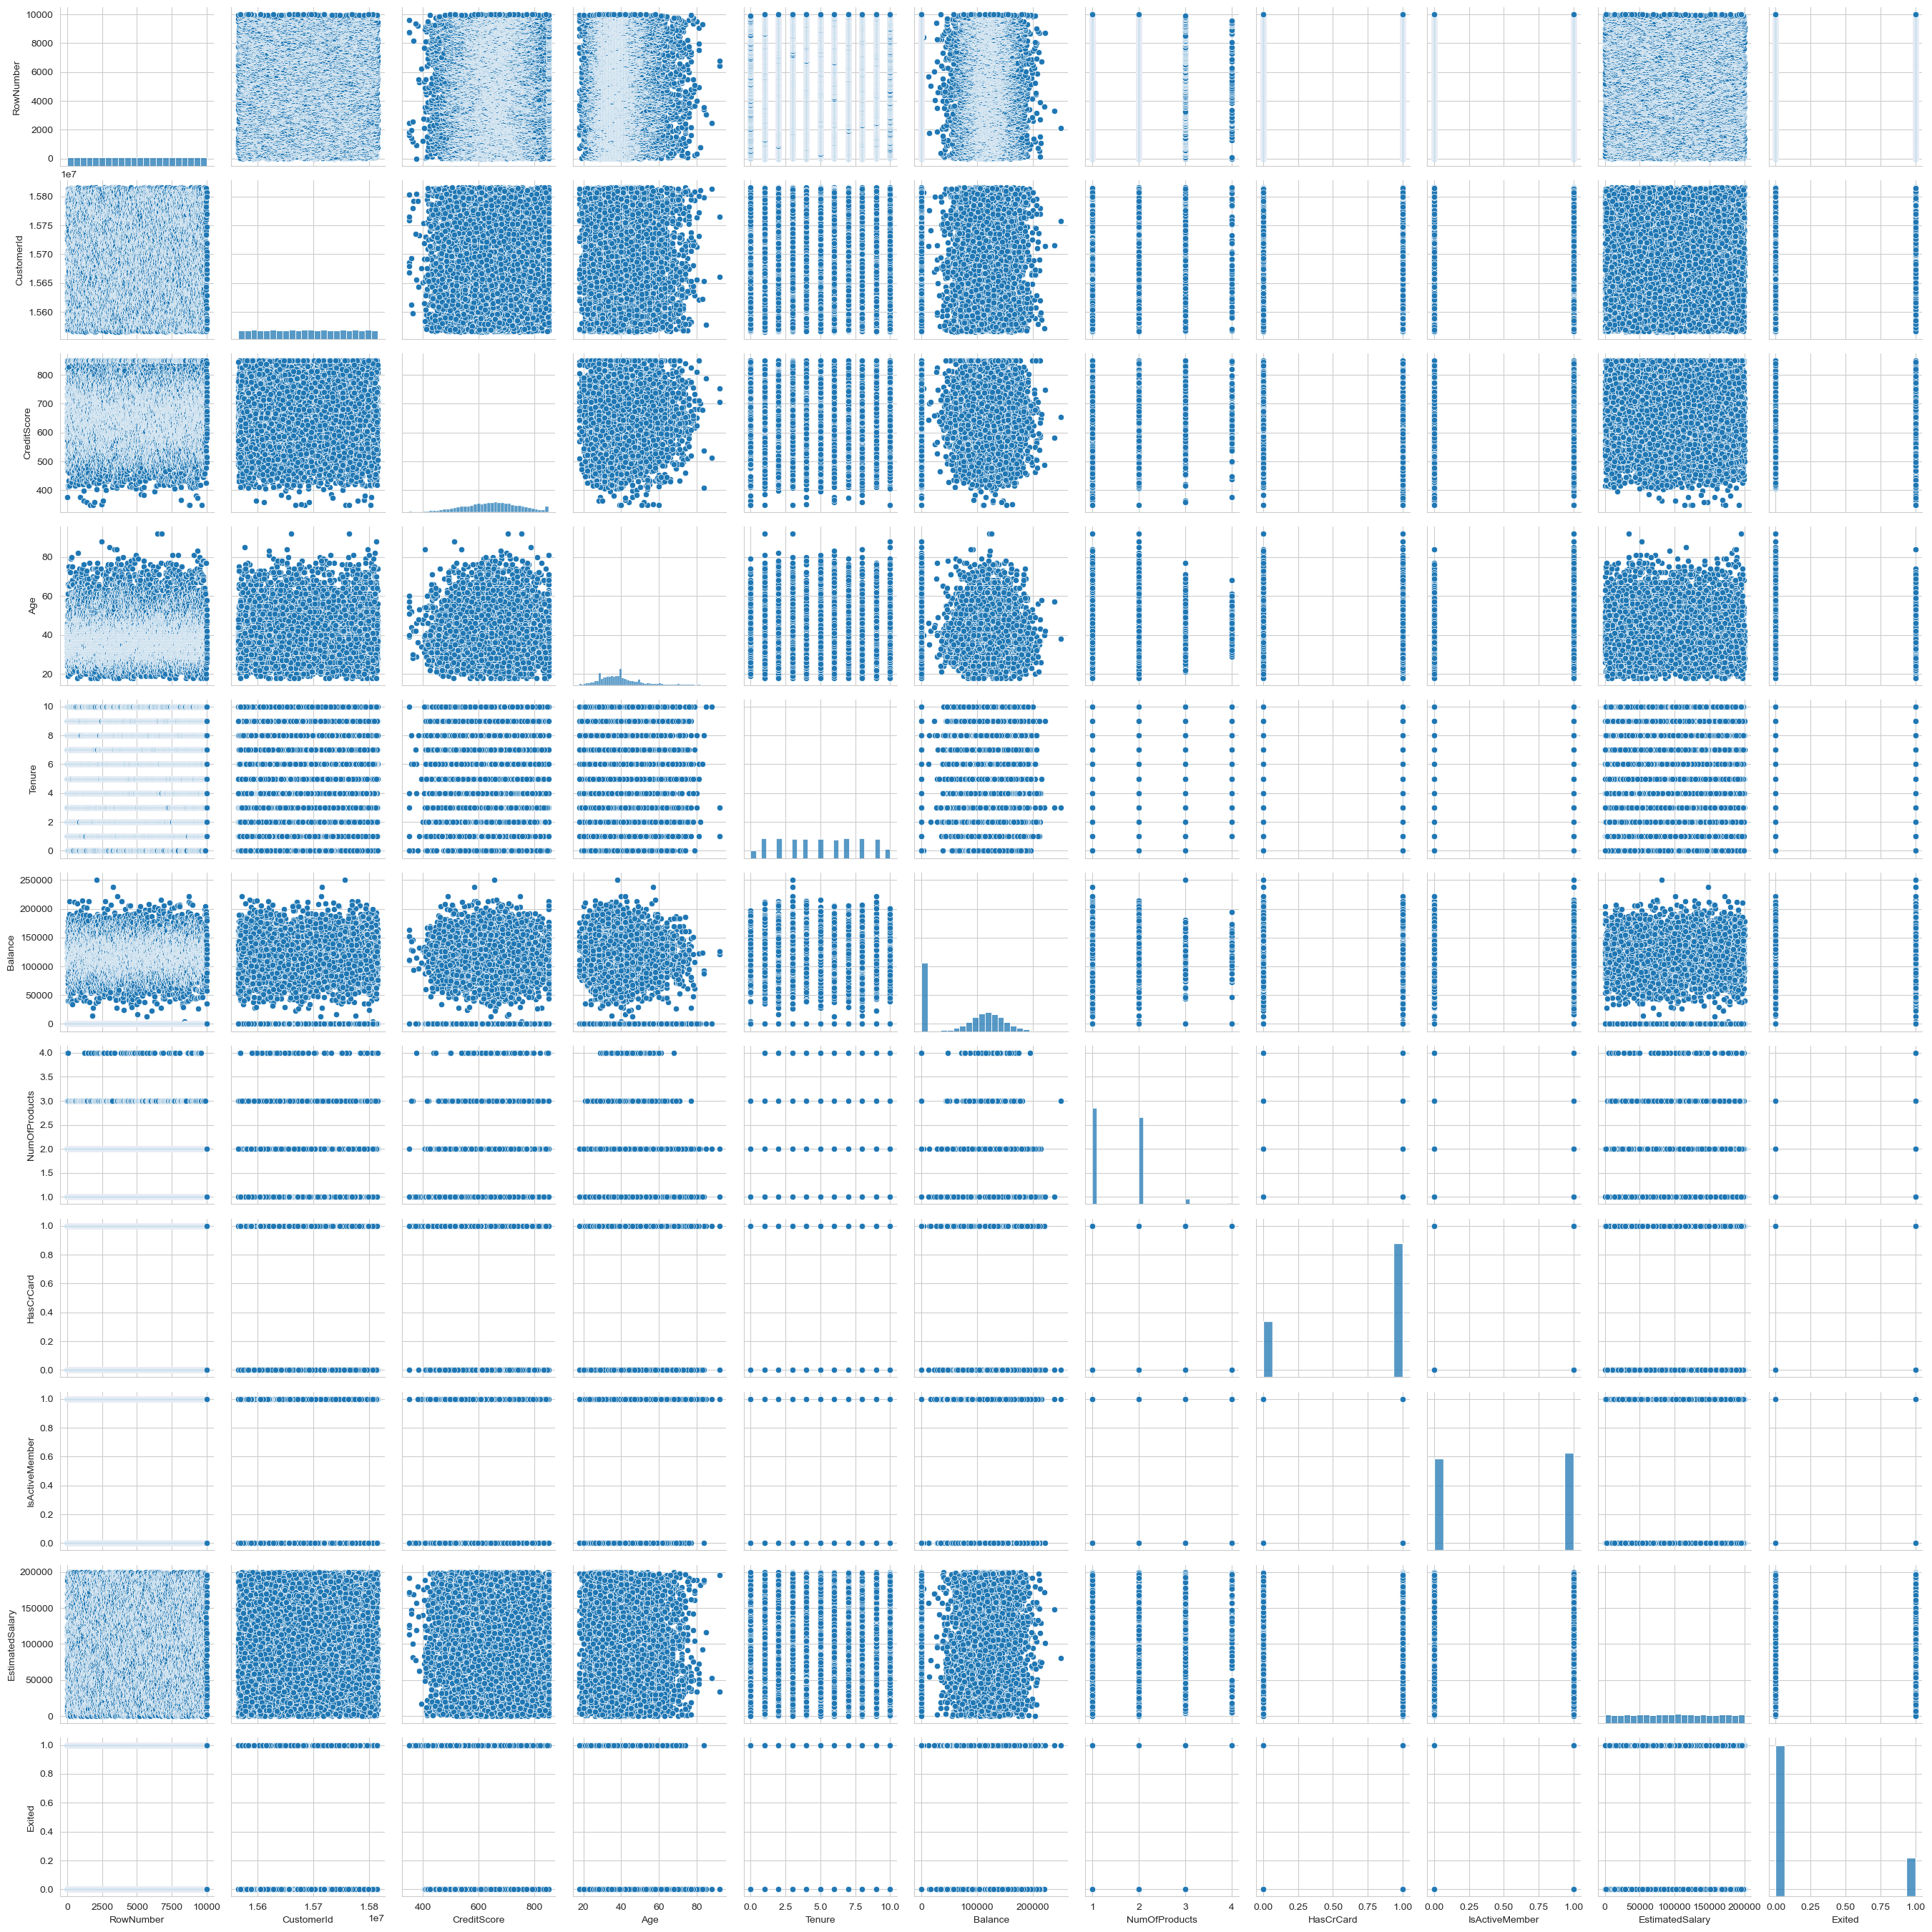

In [19]:
#visualization
sns.pairplot(df)
plt.show()

In [20]:
# Select the first 10 columns (0 to 9) as features (x)
x = df.iloc[:, 0:10]

# Select the last column (-1) as the target variable (y)
y = df.iloc[:, -1]

# Display the selected features (x)
display(x)


RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  
0                 1          1               1        101348.88  
1                 1          0               1        112542.58  
2                 3          1               0        113931.57  
3                 2          0               0         93826.63  
4                 1          1               1         79084.10  
...             ...        ...             ...              ...  
9995              2          1               0         96270.64  
9996              1          1               1        101699.77  
9997              1          0               1         42085.58  
9998              2          1               0         92888.52  
9999              1          1               0         38190.78  

[10000 rows x 10 columns]

In [21]:
display(y)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
print('Training Shape: ', x_train.shape)
print('Testing Shape: ', x_test.shape)

Training Shape:  (9000, 10)
Testing Shape:  (1000, 10)


In [23]:
regression_model = LinearRegression()

regression_model.fit(x_train, y_train)

LinearRegression()

In [24]:
import numpy as np

y_predict = regression_model.predict(x_test)
y_predict_rounded = np.round(y_predict)

sum = 0
for i, n in enumerate(y_test):
    if n == y_predict[i]:
        sum += 1

correct_predictions = np.sum(y_test == y_predict_rounded)
accuracy = correct_predictions / len(y_test)
print(accuracy)

0.81


In [25]:
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# Training accuracy
train_accuracy = model.score(x_train, y_train) * 100
print(f'Training Accuracy: {train_accuracy:.2f}%')

# Testing accuracy
test_accuracy = model.score(x_test, y_test) * 100
print(f'Testing Accuracy: {test_accuracy:.2f}%')

# Model accuracy
overall_accuracy = r2_score(y, model.predict(x)) * 100
print(f'Model Accuracy: {overall_accuracy:.2f}%')


Training Accuracy: 12.80%
Testing Accuracy: 11.56%
Model Accuracy: 12.70%


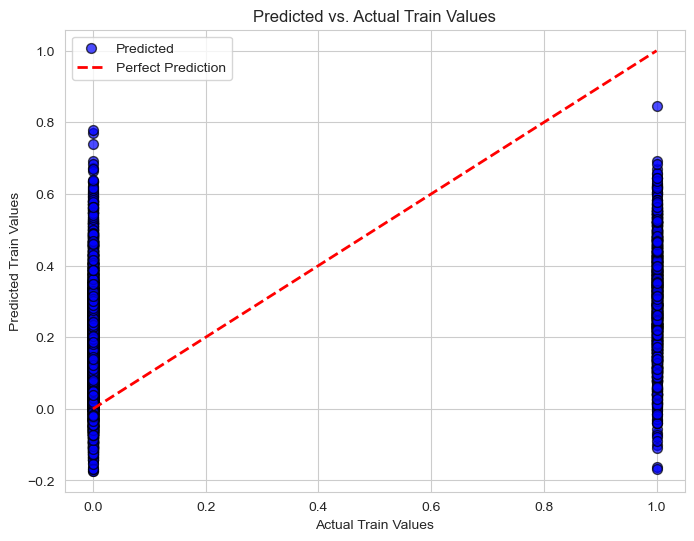

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Create and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Predict on the training set
y_train_pred = model.predict(x_train)

# Visualize the predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, alpha=0.7, label='Predicted', c='b', marker='o', edgecolors='k', s=50)

# Plot the line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction', linewidth=2)

plt.xlabel('Actual Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Predicted vs. Actual Train Values')
plt.legend()
plt.show()


In [27]:
from sklearn.linear_model import LinearRegression
import pandas as pd

# Initialize and fit the Linear Regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Make predictions on the test set
predictions = regressor.predict(x_test)

# Create a DataFrame to display the predictions
prediction_df = pd.DataFrame({'Predicted_Exit': predictions})
display(prediction_df)


Predicted_Exit
0          0.217622
1          0.138605
2          0.292140
3          0.402470
4          0.039296
..              ...
995        0.462469
996        0.162595
997        0.159223
998        0.374876
999        0.468457

[1000 rows x 1 columns]

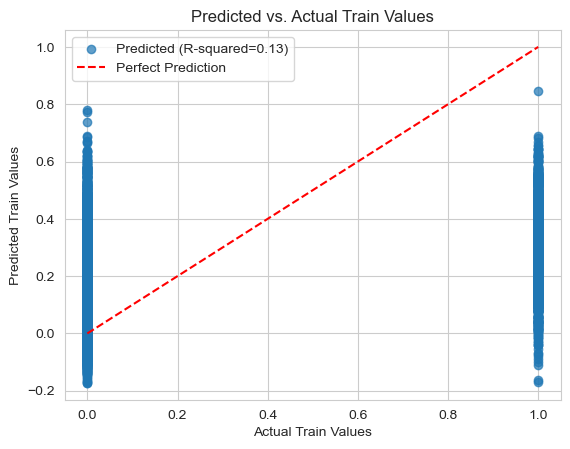

In [28]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Calculate the R-squared value for the training set
r2_train = model.score(x_train, y_train)

# Create a scatter plot for the training data and predicted values
plt.scatter(y_train, y_train_pred, alpha=0.7, label=f'Predicted (R-squared={r2_train:.2f})')

# Plot the line for perfect prediction
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Train Values')
plt.ylabel('Predicted Train Values')
plt.title('Predicted vs. Actual Train Values')
plt.legend()

plt.show()


use another algorithm to increase accuracy

Training Accuracy: 85.84%
Testing Accuracy: 86.00%
R-squared (Training): 0.13
R-squared (Testing): 0.09


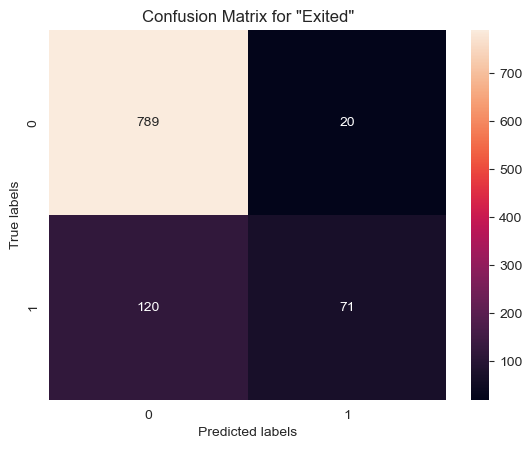

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the model
model = DecisionTreeClassifier(max_depth=5)  # Limiting depth to avoid overfitting

# Fit the model
model.fit(x_train, y_train)

# Predictions
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Testing Accuracy: {test_accuracy*100:.2f}%")

# Calculate R-squared for the training and testing sets
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared (Training): {r2_train:.2f}")
print(f"R-squared (Testing): {r2_test:.2f}")

# Create a confusion matrix and plot it
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for "Exited"')
plt.show()


Training Accuracy:  90.31589204048618
Testing Accuracy:  22.956594334677284
Model Accuracy:  83.90026257301581


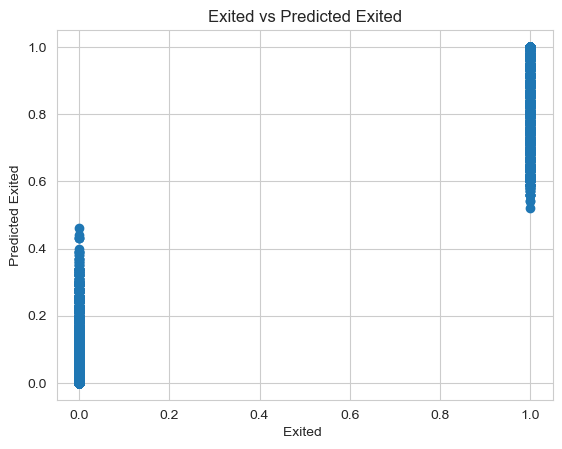

In [30]:
model = RandomForestRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_train)
print('Training Accuracy: ',model.score(x_train, y_train)*100)

from sklearn.metrics import r2_score

print('Testing Accuracy: ',model.score(x_test, y_test)*100)
print('Model Accuracy: ',r2_score(y, model.predict(x))*100)

plt.scatter(y_train,y_pred)
plt.xlabel("Exited ")
plt.ylabel("Predicted Exited")
plt.title("Exited vs Predicted Exited")
plt.show()

In [31]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

In [32]:
threshold = 0.5
y_train_classified = [1 if value > threshold else 0 for value in y_train]

In [33]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train_classified)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test_scaled)

In [35]:
y_test_classified = [1 if value > threshold else 0 for value in y_test]

In [36]:
accuracy = model.score(X_test_scaled, y_test_classified)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.815


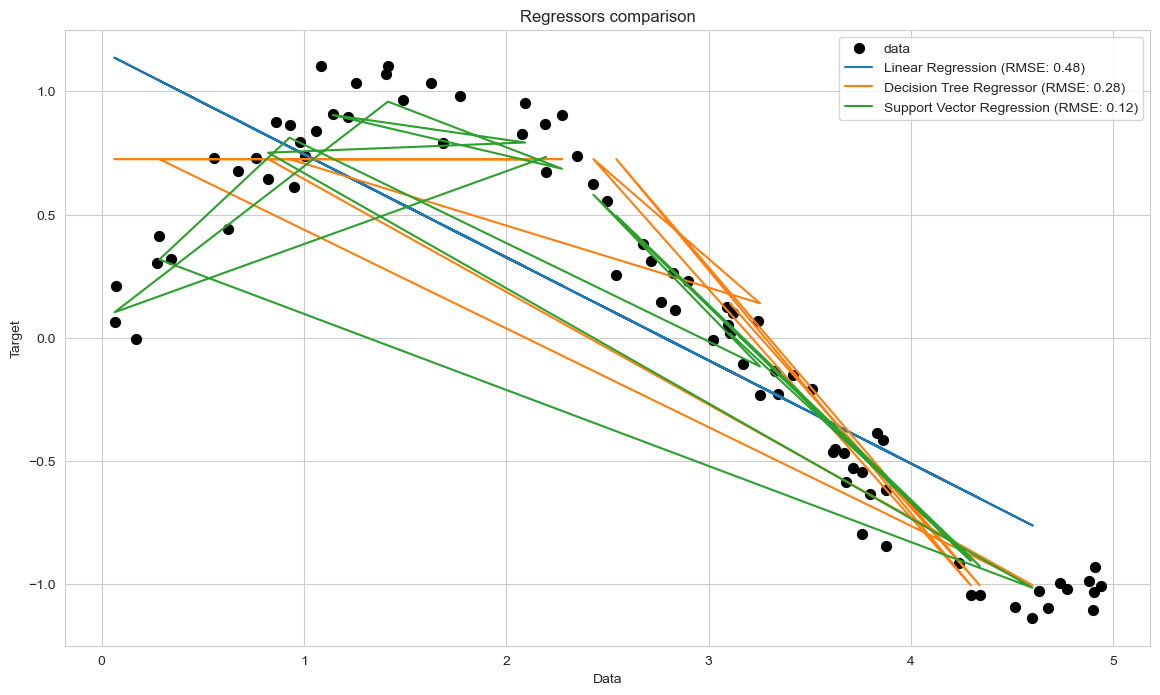

In [37]:
# Generating sample data
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.randn(80) * 0.1

# Splitting the dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1)
}

# Plotting
plt.figure(figsize=(14, 8))
plt.scatter(X, y, s=50, c="black", label="data")

for name, reg in regressors.items():
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    label = f"{name} (RMSE: {rmse:.2f})"
    plt.plot(X_test, y_pred, label=label)

plt.xlabel("Data")
plt.ylabel("Target")
plt.title("Regressors comparison")
plt.legend()
plt.show()


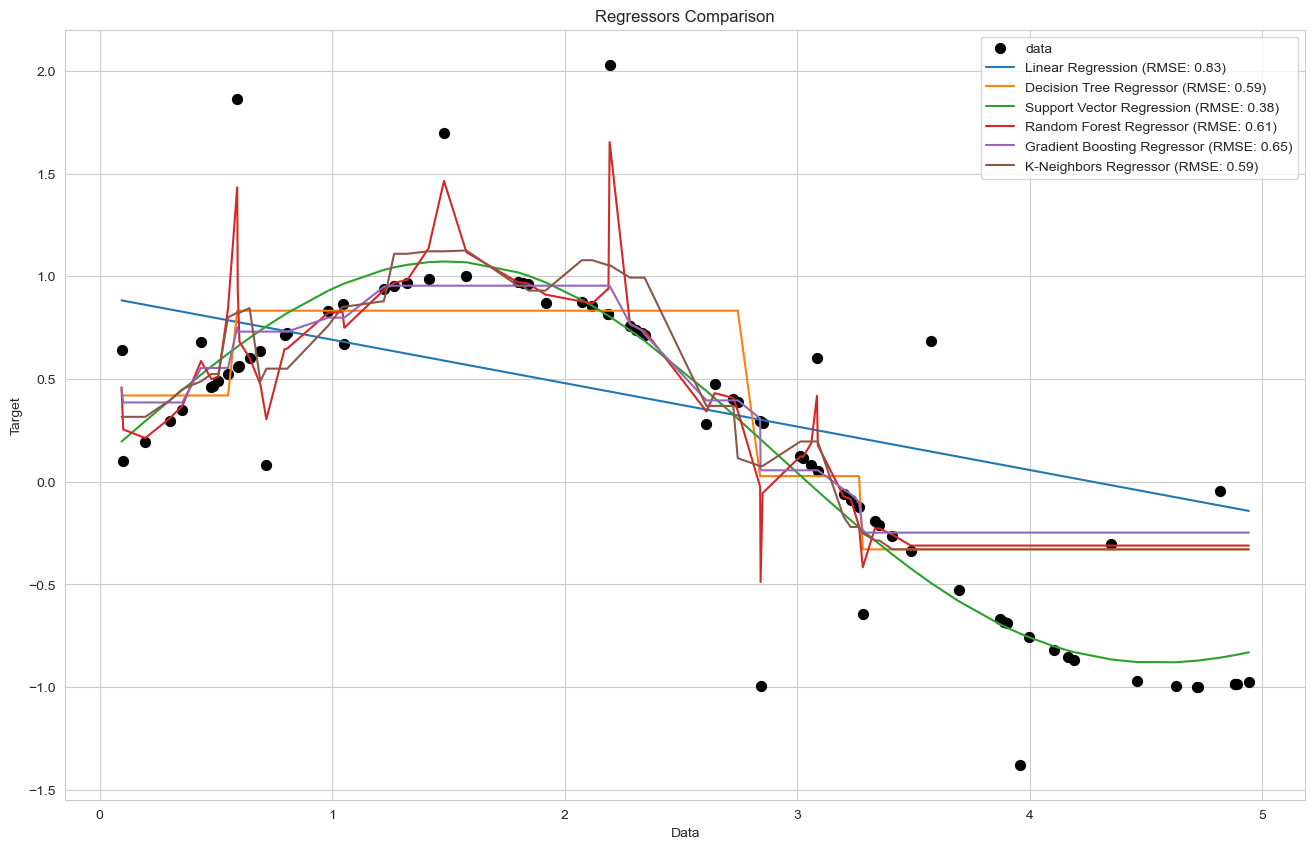

In [38]:
# Define a dictionary of regression models
regressors = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=2),
    'Support Vector Regression': SVR(kernel='rbf', C=1e3, gamma=0.1, epsilon=0.1),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=42),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5)
}

def train_evaluate_models(X_train, y_train, X_test, y_test):
    results = {}
    for name, reg in regressors.items():
        reg.fit(X_train, y_train)
        y_pred = reg.predict(X_test)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        results[name] = {'model': reg, 'rmse': rmse}
    return results

def plot_models(X, y, model_results):
    plt.figure(figsize=(16, 10))
    plt.scatter(X, y, s=50, c="black", label="data")

    for name, result in model_results.items():
        reg = result['model']
        y_pred = reg.predict(X)
        rmse = result['rmse']
        label = f"{name} (RMSE: {rmse:.2f})"
        plt.plot(X, y_pred, label=label)

    plt.xlabel("Data")
    plt.ylabel("Target")
    plt.title("Regressors Comparison")
    plt.legend()
    plt.show()

# Create synthetic data for demonstration
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - np.random.rand(16))

# Split data into training and testing sets
X_train, X_test = X[:60], X[60:]
y_train, y_test = y[:60], y[60:]

# Train and evaluate models
model_results = train_evaluate_models(X_train, y_train, X_test, y_test)

# Plot the models
plot_models(X, y, model_results)
